In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint

Pretty printing has been turned OFF


# 知识点：

- Pandas相关的melt / groupby / agg / size / reset_index / unstack / apply / map等用法。

- Seaborn相关的lineplot / barplot / boxplot / swarmplot / distplot / pairplot / FacetGrid等用法。

## 1. 航班分析

In [2]:
# 大小设置
sns.set(rc={'figure.figsize':(13,7)})
# 风格设置
sns.set_style("whitegrid")
# 加载数据
flights = sns.load_dataset("flights")
flights.head(2)

,year,month,passengers
0,1949,January,112
1,1949,February,118


### 1.1 折线图——乘客量随年份

1949年到1960年间，乘客量呈现线性增长。

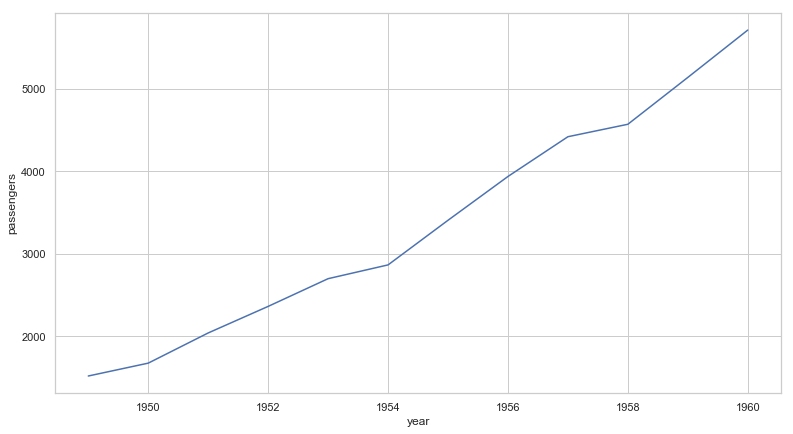

In [3]:
df = flights.loc[:, ["year", "passengers"]].groupby(by="year").agg("sum").reset_index()
sns.lineplot(x="year", y="passengers", data=df)

### 1.2 分组柱状图——每年各月份乘客量

乘客量整体呈现增长趋势，每年的七八月份是乘客量最多的月份，七月份之前乘客呈现上升趋势，八月份之后乘客量随之下降。

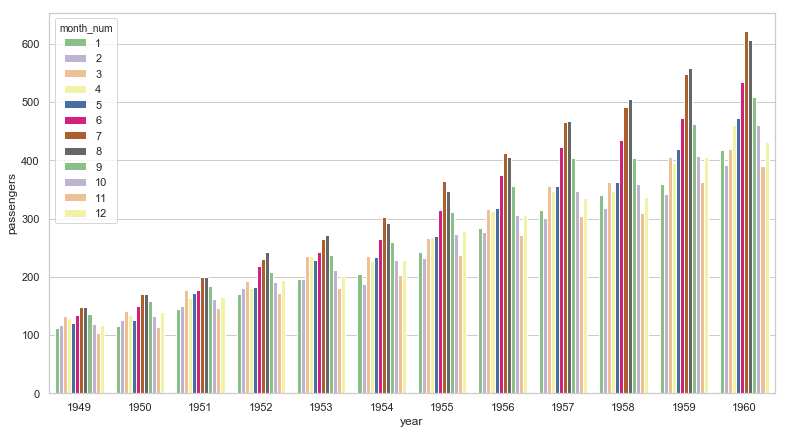

In [4]:
import calendar
flights.loc[:, 'month_num'] = flights['month'].apply(lambda x: list(calendar.month_name).index(x))
sns.barplot(x="year", y="passengers", hue="month_num",data=flights, palette="Accent")

## 2. 鸢尾花分析

In [5]:
iris_df=sns.load_dataset("iris")
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### 2.1 多组散点图

- sepal_width近似正态分布
- sepal_length与petal_length、petal_width	呈现近似正线性分布
- petal_length与petal_width呈现较强的正线性关系

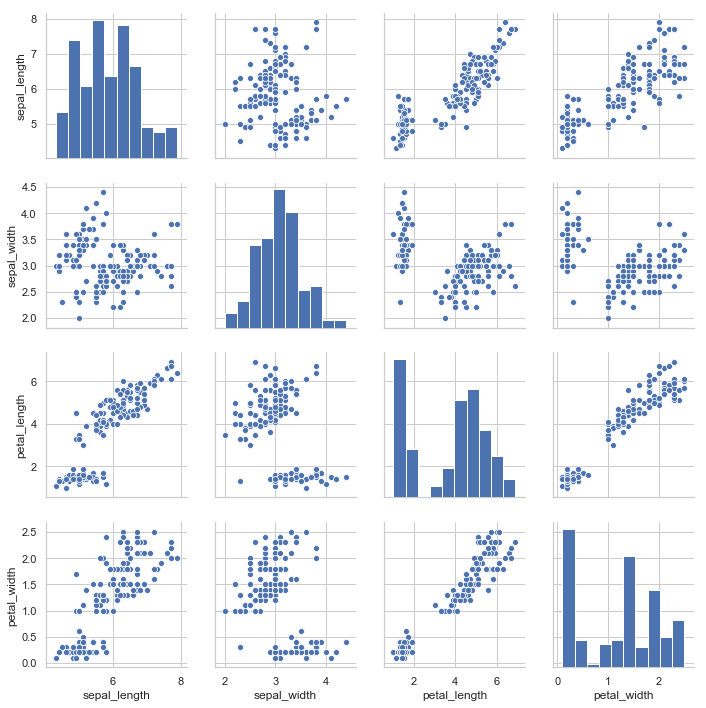

In [6]:
sns.pairplot(data=iris_df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

### 2.2 分组箱式图

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9


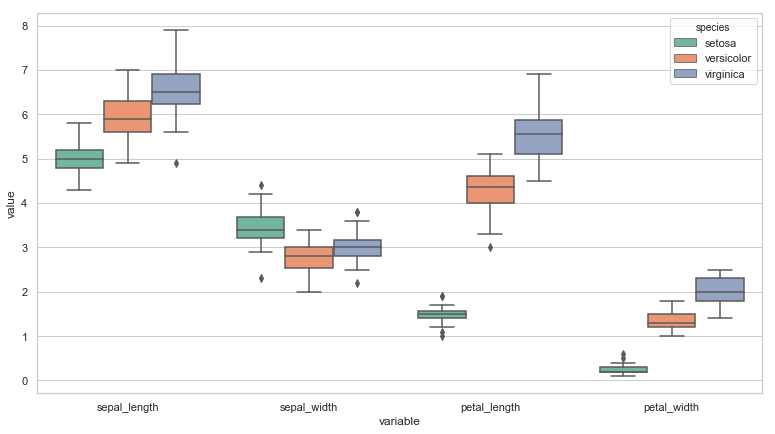

In [7]:
# melt数据变换
tmp = pd.melt(iris_df, id_vars=['species'], value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
tmp.head(2)
sns.boxplot(x="variable", y="value", hue="species", data=tmp, palette="Set2")

### 2.3 分组散点图

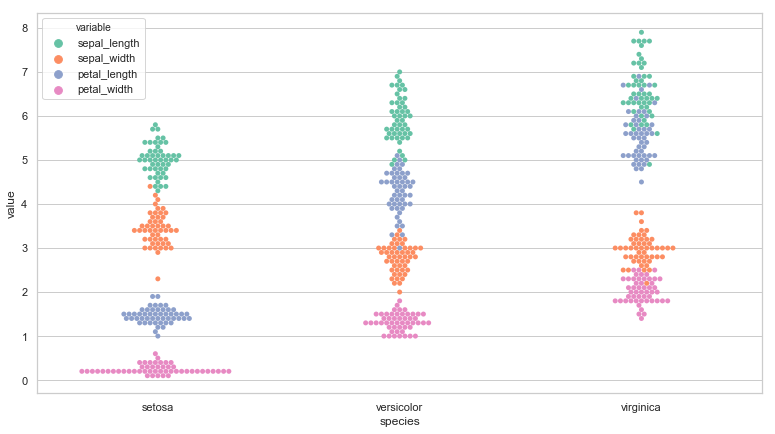

In [8]:
sns.swarmplot(x="species", y="value", hue="variable", data=tmp, palette="Set2")

### 2.4 分组概率密度图

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9


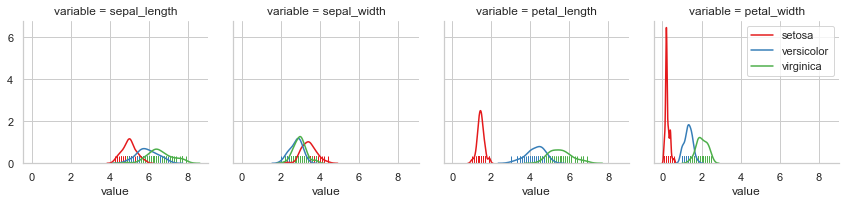

In [9]:
tmp.head(2)
g = sns.FacetGrid(tmp, col='variable', hue="species", palette="Set1")
g = (g.map(sns.distplot, "value", hist=False, rug=True))
plt.legend()
plt.show()

## 3. 泰坦尼克号分析

In [10]:
titanic = sns.load_dataset("titanic")
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### 3.1 占比堆积柱状图——舱位与幸存与否

- 一二三等舱死亡比例逐次增加

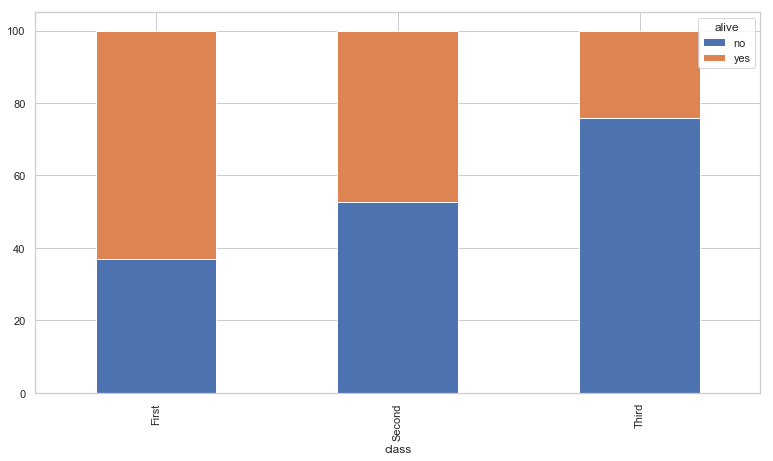

In [11]:
titanic.groupby(["class", "alive"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)